Pour la partie Kmeans avec la distance du chi2, vu qu'il n'y a pas de fonction qui le fait directement, on a essayer de contourner ce probleme en passant par la ACF.

on sachant que la distance euclidienne entre les résultat de l'ACF est égale à la distance du Chi2 des données originales, donc on va passer par un ACF suivi d'un kmeans sur les ligne et sur les colones.

In [0]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

df = pd.read_csv("dep.csv", sep=' ', index_col=0)
df = df.drop(['Total'], axis=1)

In [99]:
print(df)

         HF00  HF05  HF10  HF15  HF20  HF25  ...  HF55  HF60  HF65  HF70  HF75  HF80
Régions                                      ...                                    
ILEF     1.27  1.24  1.20  1.21  1.29  1.59  ...  0.88  0.74  0.67  0.57  0.46  0.54
CHAM     0.14  0.15  0.16  0.16  0.15  0.17  ...  0.10  0.11  0.10  0.09  0.08  0.08
PICA     0.21  0.22  0.24  0.23  0.20  0.23  ...  0.13  0.14  0.14  0.12  0.10  0.09
HNOR     0.19  0.21  0.22  0.22  0.19  0.22  ...  0.13  0.13  0.13  0.11  0.09  0.10
CENT     0.24  0.26  0.27  0.27  0.24  0.29  ...  0.19  0.21  0.21  0.19  0.16  0.18
BNOR     0.15  0.15  0.17  0.17  0.15  0.16  ...  0.10  0.12  0.12  0.11  0.09  0.09
BOUR     0.15  0.16  0.17  0.18  0.16  0.18  ...  0.13  0.14  0.15  0.13  0.11  0.12
NORD     0.46  0.48  0.52  0.54  0.49  0.50  ...  0.26  0.29  0.29  0.26  0.21  0.18
LORR     0.23  0.25  0.27  0.28  0.26  0.28  ...  0.18  0.19  0.19  0.17  0.12  0.12
ALSA     0.19  0.19  0.19  0.19  0.19  0.23  ...  0.14  0.14  0.1

In [54]:
!pip install prince

In [124]:
import prince
ca = prince.CA(n_components=10,n_iter=3,random_state=42)
ca.fit(df)

CA(benzecri=False, check_input=True, copy=True, engine='auto', n_components=10,
   n_iter=3, random_state=42)

In [101]:
print(ca.row_coordinates(df))

               0         1
ILEF    0.121132 -0.043430
CHAM    0.016792  0.018657
PICA    0.057846  0.047995
HNOR    0.051179  0.031501
CENT   -0.058027 -0.001714
BNOR   -0.029393  0.042396
BOUR   -0.087742 -0.002402
NORD    0.077908  0.077858
LORR    0.016594  0.025234
ALSA    0.058634 -0.011893
FCOMTE  0.009046  0.014147
PAYS   -0.007980  0.034532
BRET   -0.054160  0.023451
POIT   -0.120171 -0.006209
AQUI   -0.097923 -0.016713
MIDI   -0.099861 -0.025954
LIMO   -0.220151 -0.047565
RHON    0.028785 -0.001663
AUVE   -0.114219 -0.022529
LANG   -0.102125  0.001597
PROV   -0.080524 -0.019584
CORS   -0.092640 -0.035469


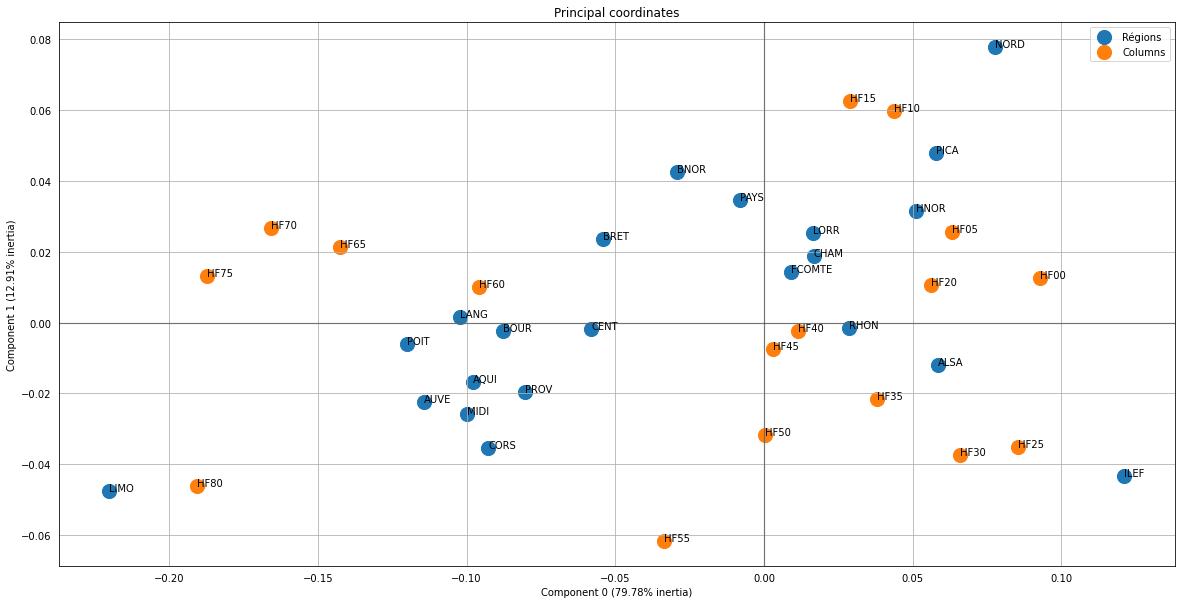

In [102]:
ca.plot_coordinates(df, figsize=(20, 10), s = 200)

En utilisant la méthode du coude sur R, on trouver le nombre de cluster optimale = 3![Texte alternatif…](https://drive.google.com/uc?id=1Evhg-ur62Dz81I6H53zhhEdSnXIZu6a5)

le code pour le faire :
# Elbow method
fviz_nbclust(t(df), kmeans, method = "wss") +
  geom_vline(xintercept = 3, linetype = 2)+
  labs(subtitle = "Elbow method")


In [0]:
res_kmeans = KMeans(n_clusters= 3)
res_kmeans = res_kmeans.fit(ca.row_coordinates(df))

In [130]:
res_kmeans.labels_

array([1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0],
      dtype=int32)

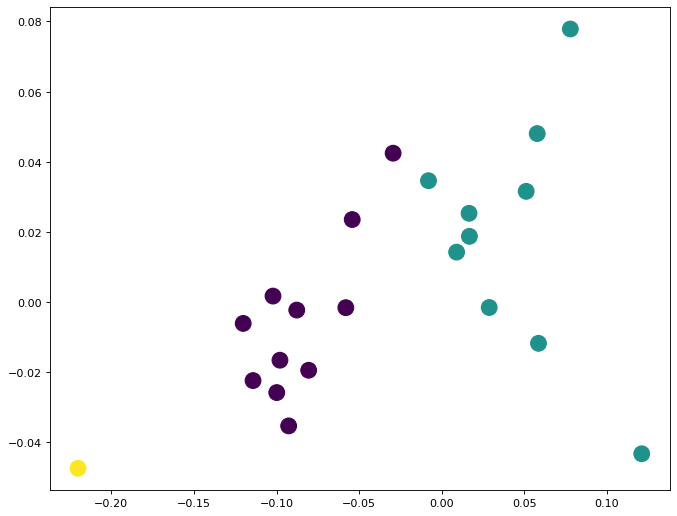

In [154]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8), dpi=80)
plt.scatter(ca.row_coordinates(df)[0],ca.row_coordinates(df)[1], c = res_kmeans.labels_, s = 200)

Reponse sur la question A) on vois que le kmeans avec la distance du chi2 sur les département nous donne les profile des département qui sont similaire suivant les tranches d'age, et ça a donner 3 profile différents. 

In [132]:
ca2 = prince.CA(n_components=2,n_iter=3,random_state=42)
ca2.fit(df.T)
print(ca2.row_coordinates(df.T))

             0         1
HF00 -0.092733  0.012603
HF05 -0.063326  0.025461
HF10 -0.043789  0.059741
HF15 -0.029024  0.062630
HF20 -0.056180  0.010710
HF25 -0.085507 -0.035112
HF30 -0.065811 -0.037470
HF35 -0.038033 -0.021713
HF40 -0.011414 -0.002284
HF45 -0.003234 -0.007537
HF50 -0.000273 -0.031843
HF55  0.033487 -0.061755
HF60  0.095921  0.009912
HF65  0.142465  0.021366
HF70  0.165961  0.026737
HF75  0.187444  0.013160
HF80  0.190604 -0.046325


Pour les tranches d'age le nombre de classes optimale est 2.
![Texte alternatif…](https://drive.google.com/uc?id=1Z7YWeR7H2bJ_gCbhWK-gaedt6ZuLzavM) 

In [139]:
res_kmeans2 = KMeans(n_clusters= 2)
res_kmeans2 = res_kmeans2.fit(ca2.row_coordinates(df.T))
res_kmeans.labels_

array([1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0],
      dtype=int32)

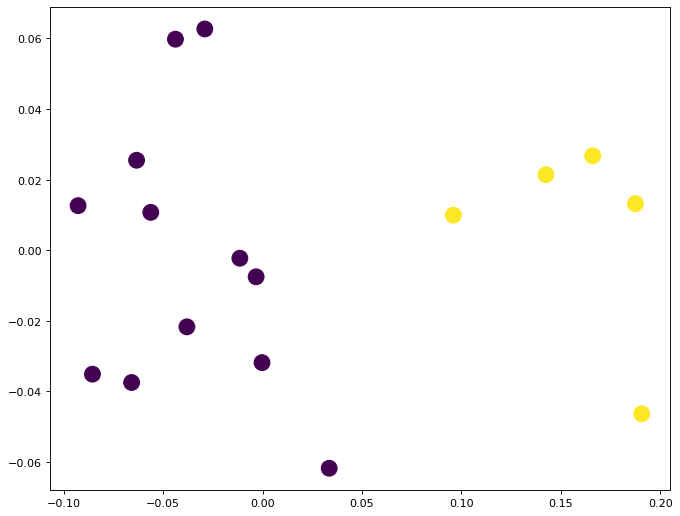

In [153]:
plt.figure(figsize=(10, 8), dpi=80)
plt.scatter(ca2.row_coordinates(df.T)[0],ca2.row_coordinates(df.T)[1], c = res_kmeans2.labels_, s = 200)

La meme chose pour le kmeans sur les colones, ça donne les profiles des tranche d'age qu'on trouve dans presq les meme départements.

In [137]:
!pip install coclust


  Created wheel for coclust: filename=coclust-0.2.1-cp36-none-any.whl size=29872 sha256=0581d577f8657b5d481eb37656e2238b420cf160a1251d530a5bc4fabe69b71f
  Stored in directory: /root/.cache/pip/wheels/cd/d7/68/df601d0b5f8b934cf890dc626c2271df381fb0c3e910b0a34e
Successfully built coclust


In [142]:
from coclust.coclustering import CoclustInfo

res_coclust = CoclustInfo(n_row_clusters=3, n_col_clusters=2, n_init=4).fit(df.values)

/usr/local/lib/python3.6/dist-packages/coclust/coclustering/coclust_info.py:97: FutureWarning: 'warn_on_dtype' is deprecated in version 0.21 and will be removed in 0.23. Don't set `warn_on_dtype` to remove this warning.
  warn_on_dtype=False, estimator=None)


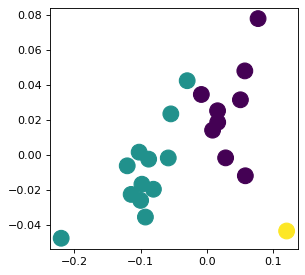

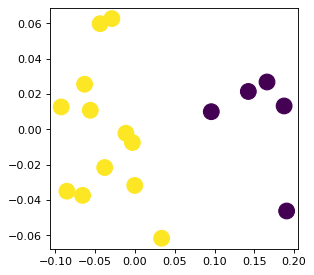

In [152]:

plt.figure(figsize=(4, 4), dpi=80)
plt.scatter(ca.row_coordinates(df)[0],ca.row_coordinates(df)[1], c = res_coclust.row_labels_, s = 200)

plt.figure(figsize=(4, 4), dpi=80)
plt.scatter(ca2.row_coordinates(df.T)[0],ca2.row_coordinates(df.T)[1], c = res_coclust.column_labels_, s = 200)

On vois que coclustInfo a prédit les meme classes que pour kmeans.